In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
import torch

torch.backends.cudnn.benchmark = True
print(torch.backends.cudnn.enabled)
print(torch.backends.cudnn.benchmark)


True
True


In [3]:
read_excelfile = pd.read_csv('output.csv')

In [4]:
# Display the first few rows of the DataFrame
print("oragalay data:-\n",read_excelfile,"\n")
read_excelfile.drop(read_excelfile.index[:4], inplace=True)
print("after droping data:-\n",read_excelfile)




oragalay data:-
       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0 

In [5]:


# Check for missing values in age column
print("check missing values:\n", read_excelfile.isnull().sum())

# Drop missing values (if needed, but working on original df)
read_excelfile_dropped = read_excelfile.dropna()
print("after drop missing values:\n", read_excelfile_dropped)
print("after drop missing values:\n", read_excelfile_dropped.isnull().sum())

# Fill missing values in original df
read_excelfile['age'] = read_excelfile['age'].fillna(read_excelfile['age'].mean())

# Print after fill missing values for specific rows
print(read_excelfile.iloc[5]['age'])
print(read_excelfile.iloc[1]['age'])

# Count the float values in age column
count_age_float = read_excelfile['age'].apply(lambda x: isinstance(x, float)).sum()
print("count float value in age column:", count_age_float)

# Convert float to int in age column
read_excelfile['age'] = read_excelfile['age'].round().astype(int)


check missing values:
 pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          821
body         1185
home.dest     564
dtype: int64
after drop missing values:
 Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest]
Index: []
after drop missing values:
 pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64
71.0
48.0
count float value in age column: 1305


In [6]:
read_embarked = read_excelfile['embarked']

# Check total NULL value in embarked column

print("total NULL value:-\n",read_excelfile['embarked'].isnull().sum(),'\n') # before filling NULL value
# Fill NULL value with mode value in embarked column
mode_value = read_excelfile['embarked'].mode()[0] 
read_excelfile['embarked'].fillna(mode_value, inplace=True)

print("total NULL value after fillingh it :-\n",read_excelfile['embarked'].isnull().sum(),'\n')# after filling NULL value

# embarked cloum is encoding

le_embarked = LabelEncoder()

read_excelfile['embarked_le'] = le_embarked.fit_transform(read_embarked)
print(le_embarked.classes_)
print(read_excelfile[['embarked', 'embarked_le']])



total NULL value:-
 2 

total NULL value after fillingh it :-
 0 

['C' 'Q' 'S']
     embarked  embarked_le
4           S            2
5           S            2
6           S            2
7           S            2
8           S            2
...       ...          ...
1304        C            0
1305        C            0
1306        C            0
1307        C            0
1308        S            2

[1305 rows x 2 columns]


In [7]:
# Fill missing values in fare column with mean fare
read_excelfile['fare'].fillna(read_excelfile['fare'].mean(), inplace=True)
print("total NULL value in fare column after filling it:-\n",read_excelfile['fare'].isnull().sum(),'\n')

total NULL value in fare column after filling it:-
 0 



C:\Users\LOQ\AppData\Local\Temp\ipykernel_19396\3044317771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  read_excelfile['fare'].fillna(read_excelfile['fare'].mean(), inplace=True)


In [8]:
#sex cloum is encoding 
read_sex = read_excelfile['sex']
le_sex = LabelEncoder()

read_excelfile['sex_le'] = le_sex.fit_transform(read_sex)

print(read_excelfile[['sex', 'sex_le']])




         sex  sex_le
4     female       0
5       male       1
6     female       0
7       male       1
8     female       0
...      ...     ...
1304  female       0
1305  female       0
1306    male       1
1307    male       1
1308    male       1

[1305 rows x 2 columns]


In [9]:
read_excelfile.drop(columns=['name', 'ticket','embarked','cabin','sex'], inplace=True)
read_excelfile.drop(columns=['home.dest', 'body', 'boat'], inplace=True)
print ("after drop unnecessory column:\n", read_excelfile.head())


after drop unnecessory column:
    pclass  survived  age  sibsp  parch      fare  embarked_le  sex_le
4       1         0   25      1      2  151.5500            2       0
5       1         1   48      0      0   26.5500            2       1
6       1         1   63      1      0   77.9583            2       0
7       1         0   39      0      0    0.0000            2       1
8       1         1   53      2      0   51.4792            2       0


In [10]:
# Separate features and target variable
x_survived = read_excelfile.drop(columns=['survived'])
y_non_survived = read_excelfile['survived']

In [11]:
#Feature Scaling



# Standard Scaler 
standar_scaler = StandardScaler()
x_scaled = standar_scaler.fit_transform(x_survived)
x_scaled = pd.DataFrame(x_scaled, columns=x_survived.columns) # Convert back to DataFrame for better visualization(standar_scaler)

# Min-Max Scaler
minmax_scaler = MinMaxScaler()
x_minmax_scaled = minmax_scaler.fit_transform(x_survived)
x_minmax_scaled = pd.DataFrame(x_minmax_scaled, columns=x_survived.columns)# Convert back to DataFrame for better visualization(minmax_scaler)

#print first 5 rows of standar scaler
print("Standard Scaled Features:\n", x_scaled[:50])

#print first 5 rows of minmax scaler
print("Min-Max Scaled Features:\n", x_minmax_scaled[:50]) 


Standard Scaled Features:
      pclass       age     sibsp     parch      fare  embarked_le    sex_le
0  -1.55417 -0.384565  0.481460  1.875274  2.315423     0.623602 -1.346291
1  -1.55417  1.405560 -0.477785 -0.442181 -0.123649     0.623602  0.742781
2  -1.55417  2.573034  0.481460 -0.442181  0.879459     0.623602 -1.346291
3  -1.55417  0.705076 -0.477785 -0.442181 -0.641708     0.623602  0.742781
4  -1.55417  1.794718  1.440705 -0.442181  0.362784     0.623602 -1.346291
5  -1.55417  3.195686 -0.477785 -0.442181  0.324247    -1.831303  0.742781
6  -1.55417  1.327729  0.481460 -0.442181  3.797890    -1.831303  0.742781
7  -1.55417 -0.929386  0.481460 -0.442181  3.797890    -1.831303 -1.346291
8  -1.55417 -0.462397 -0.477785 -0.442181  0.710514    -1.831303 -1.346291
9  -1.55417 -0.306734 -0.477785 -0.442181  0.896859     0.623602 -1.346291
10 -1.55417  3.896170 -0.477785 -0.442181 -0.056331     0.623602  0.742781
11 -1.55417  0.004592 -0.477785 -0.442181 -0.135844     0.623602  0.74278

In [12]:
#train test split the table 
x = x_minmax_scaled
y = y_non_survived
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train:\n",x_train)
print("x_test:\n",x_test)
print("y_train:\n",y_train)
print("y_test:\n",y_test)
print("x_test.isna().sum():\n",x_test.isna().sum())

x_train:
       pclass     age  sibsp     parch      fare  embarked_le  sex_le
982      1.0  0.2750  0.000  0.000000  0.013907          1.0     1.0
969      1.0  0.3750  0.000  0.000000  0.014737          1.0     1.0
10       0.0  1.0000  0.000  0.000000  0.058556          1.0     1.0
147      0.0  0.3375  0.000  0.000000  0.149765          0.0     1.0
346      0.5  0.1875  0.000  0.222222  0.076123          1.0     0.0
...      ...     ...    ...       ...       ...          ...     ...
1095     1.0  0.1000  0.375  0.111111  0.041136          1.0     0.0
1130     1.0  0.3000  0.000  0.000000  0.016908          1.0     1.0
1294     1.0  0.4500  0.000  0.000000  0.018543          1.0     1.0
860      1.0  0.3500  0.000  0.000000  0.015176          1.0     0.0
1126     1.0  0.2250  0.000  0.000000  0.015176          1.0     0.0

[1044 rows x 7 columns]
x_test:
       pclass     age  sibsp     parch      fare  embarked_le  sex_le
1172     1.0  0.3750  1.000  0.222222  0.135753          1.

In [13]:
# Get user input for prediction

name = input("enter name value:")
while True: #AGE INPUT VALIDATION
    try:
        pclass = int(input("enter pclass value(in 1, 2, 3):"))
        break
    except ValueError:
        print("❌ Invalid input! Enter a valid   number (e.g., 1, 0)")


while True: #AGE INPUT VALIDATION
    try:
        age = int (input("enter age value:"))
        break
    except ValueError:
        print("❌ Invalid input! Enter a valid   number (e.g., 1, 0)")
while True: #SEX_LE INPUT VALIDATION
    try:
        sex_le = int(input("enter sex_le value(in 0, 1):"))
        break
    except ValueError:
        print("❌ Invalid input! Enter a valid   number (e.g., 1, 0)")
while True:# SIBSP INPUT VALIDATION
    try:
        sibsp = int(input("enter sibsp value:"))
        break
    except ValueError:
        print("❌ Invalid input! Enter a valid   number (e.g., 1, 0, 2.....)")
while True:# PARCH INPUT VALIDATION
    try:
        parch = int(input("enter parch value:"))
        break
    except ValueError:
        print("❌ Invalid input! Enter a valid   number (e.g., 1, 0, 2.....)")
while True:# FARE INPUT VALIDATION
    try:
        fare = float(input("enter fare value: "))
        break
    except ValueError:
        print("❌ Invalid input! Enter a valid decimal number (e.g., 5.0)")

while True:# EMBARKED_LE INPUT VALIDATION
    try:
        embarked_le = int(input("enter embarked_le value(in 0, 1, 2):"))
        break
    except ValueError:
        print("❌ Invalid input! Enter a valid   number (e.g., 1, 0, 2)")
# Create input array in correct order: pclass, age, sibsp, parch, fare, embarked_le, sex_le
input_data = [[pclass, age, sibsp, parch, fare, embarked_le, sex_le]]

# Scale the input using the same scaler
input_scaled = standar_scaler.transform(input_data)
print("Scaled Input Data:", input_scaled)


Scaled Input Data: [[-1.55416968 -0.38456544 -0.47778492 -0.44218112  3.48383554 -1.83130318
   0.74278135]]


c:\Users\LOQ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
#LinearRegression


"""
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y) #x= features , y= target
model.predict([[value]])
"""

model = LinearRegression()
model.fit(x_train,y_train) 
y_pred_test = model.predict(x_test)
# Predict
prediction = model.predict(input_scaled)[0]


print(f"Predicted Survival Probability: {prediction:.2f}")
# Assuming survival prediction: if > 0.5, survive (adjust threshold as needed)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae:2.2%}")
print(f"Mean Squared Error: {mse:.2%}")
print(f"Root Mean Squared Error: {rmse:.2%}")



Predicted Survival Probability: 2.44
Mean Absolute Error: 30.74%
Mean Squared Error: 15.12%
Root Mean Squared Error: 38.89%


c:\Users\LOQ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
#LogisticRegression

""" 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y) #x= features , y= target
model.predict([[value]])
"""

from sklearn.metrics import precision_recall_curve

model = LogisticRegression()
model.fit(x_train,y_train) 
# Predict on test set for accuracy
y_pred_test = model.predict(x_test)

# Predict probabilities for precision-recall curve
y_prob = model.predict_proba(x_test)[:, 1]

# Predict on user input
prediction = model.predict(input_scaled)[0]

# Assuming survival prediction: 1 = survive, 0 = not survive
if prediction == 1:
    print(f"{name} survived. ")
else:
    print(f"{name} did not survive.")    

# print accuray
print(f"Accuracy by accuracy_score :{accuracy_score(y_test, y_pred_test):.2f}", )
print(f"Accuracy by  precision_score:{precision_score(y_test, y_pred_test):.2f}", )
print(f"Accuracy by  recall_score:{recall_score(y_test, y_pred_test):.2f}")
print(f"Accuracy by  f1_score:{f1_score(y_test, y_pred_test):.2f}")

#print confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cm)

# Mean Absolute Error and Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae:.2%}")
print(f"Mean Squared Error: {mse:.2%}")
print(f"Root Mean Squared Error: {rmse:.2%}")

#report
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)



h survived. 
Accuracy by accuracy_score :0.76
Accuracy by  precision_score:0.62
Accuracy by  recall_score:0.70
Accuracy by  f1_score:0.66
Confusion Matrix:
 [[137  37]
 [ 26  61]]
Mean Absolute Error: 24.14%
Mean Squared Error: 24.14%
Root Mean Squared Error: 49.13%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       174
           1       0.62      0.70      0.66        87

    accuracy                           0.76       261
   macro avg       0.73      0.74      0.74       261
weighted avg       0.77      0.76      0.76       261



c:\Users\LOQ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


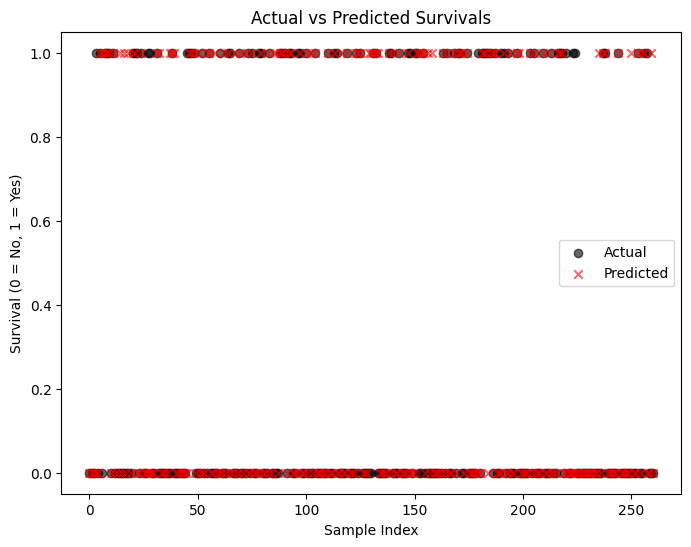

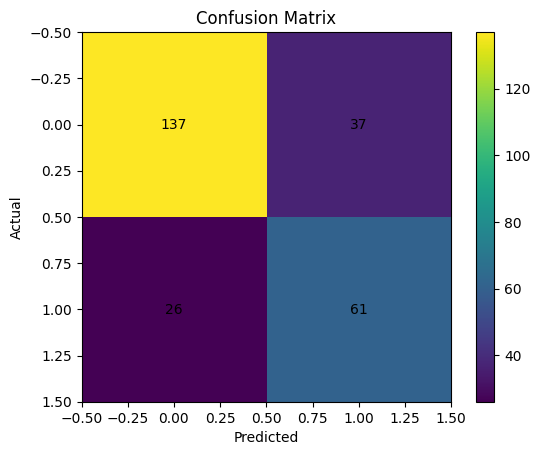

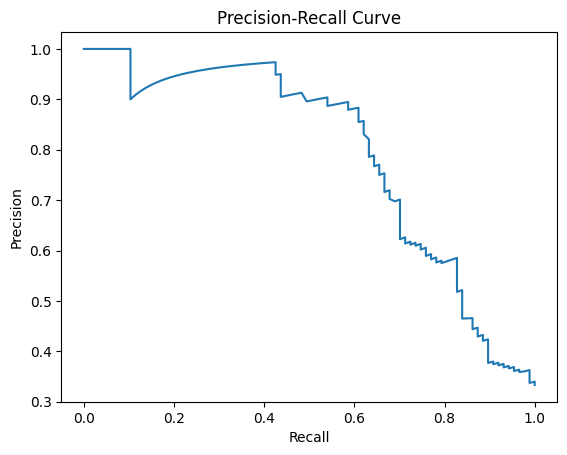

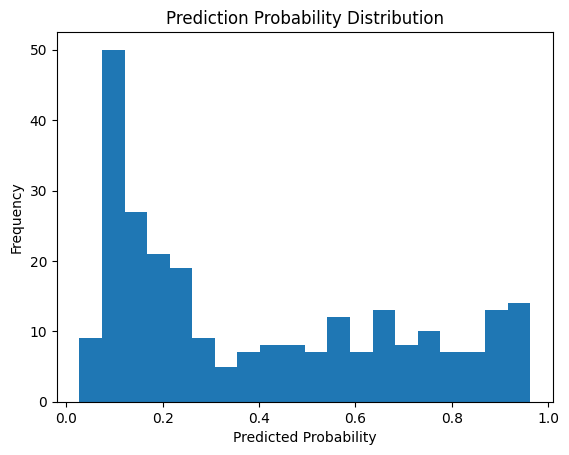

In [16]:
# graph of logistic regression
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='black', label='Actual', alpha=0.6, marker='o')
plt.scatter(range(len(y_pred_test)), y_pred_test, color='red', label='Predicted', alpha=0.6, marker='x')
plt.title('Actual vs Predicted Survivals')
plt.xlabel('Sample Index')
plt.ylabel('Survival (0 = No, 1 = Yes)')
plt.legend()
plt.show()

# print classification report

 
#print matrix heatmap
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

# 
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

#
plt.hist(y_prob, bins=20)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Prediction Probability Distribution")
plt.show()

# seaborn heatmap for bar chart
# Removed erroneous line: cm is a confusion matrix (numpy array), not a DataFrame with 'sepal_length'
# If you meant to plot something else, replace with appropriate code, e.g., sns.histplot on a relevant column from read_excelfile

In [17]:
#KNeighborsClassifier 

"""
from sklearn.neighbors import DecisionTreeClassifier
model =KNeighborsClassifier(n_neighbors=120) # n_neighbors = value given k in K-Nearest Neighbors (KNN) example :- k=3 that means n_neighbors=3
model.fit(x_train,y_train) #x= features , y= target
model.predict([[value]])
"""

model = DecisionTreeClassifier()
model.fit(x_train,y_train) 

y_pred_test = model.predict(x_test)
# Predict
prediction = model.predict(input_scaled)[0]
print("Prediction:", prediction)
print("Accuracy by accuracy_score :", accuracy_score(y_test, y_pred_test))
print("Accuracy by  precision_score:", precision_score(y_test, y_pred_test))
print("Accuracy by  recall_score:", recall_score(y_test, y_pred_test))
print("Accuracy by  f1_score:", recall_score(y_test, y_pred_test))

Prediction: 1
Accuracy by accuracy_score : 0.7471264367816092
Accuracy by  precision_score: 0.6
Accuracy by  recall_score: 0.7241379310344828
Accuracy by  f1_score: 0.7241379310344828


c:\Users\LOQ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [18]:
#Decision Tree Classifier

"""
from sklearn.neighbors import DecisionTree
model =DecisionTreeClassifier() # n_neighbors = value given k in K-Nearest Neighbors (KNN) example :- k=3 that means n_neighbors=3
model.fit(x_train,y_train) #x= features , y= target
model.predict([[value]])
"""

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train) 
y_pred_test = model.predict(x_test)
# Predict
prediction = model.predict(input_scaled)[0]
print("Prediction:", prediction)
print("Accuracy by accuracy_score :", accuracy_score(y_test, y_pred_test))
print("Accuracy by  precision_score:", precision_score(y_test, y_pred_test))
print("Accuracy by  recall_score:", recall_score(y_test, y_pred_test))
print("Accuracy by  f1_score:", recall_score(y_test, y_pred_test))

Prediction: 1
Accuracy by accuracy_score : 0.8007662835249042
Accuracy by  precision_score: 0.7011494252873564
Accuracy by  recall_score: 0.7011494252873564
Accuracy by  f1_score: 0.7011494252873564


c:\Users\LOQ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [19]:
#Random Forest

model = RandomForestClassifier( n_estimators=200,
    max_depth=7,
    min_samples_split=10,
    random_state=42)
model.fit(x_train,y_train) 
y_pred_test = model.predict(x_test)
# Predict
prediction = model.predict(input_scaled)[0]
if prediction == 1:
    print(f"{name} survived. {prediction}")
else:
    print(f"{name} did not survive.")  
    print("Accuracy by accuracy_score :", accuracy_score(y_test, y_pred_test))

print("Accuracy by  precision_score:", precision_score(y_test, y_pred_test))
print("Accuracy by  recall_score:", recall_score(y_test, y_pred_test))
print("Accuracy by  f1_score:", recall_score(y_test, y_pred_test))  

h survived. 1
Accuracy by  precision_score: 0.7023809523809523
Accuracy by  recall_score: 0.6781609195402298
Accuracy by  f1_score: 0.6781609195402298


c:\Users\LOQ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#K-Means Clustering
"""
model = KMeans(n_clusters=966, random_state=42)
model.fit(x_train) 

# Predict
prediction = model.predict(input_scaled)[0]
print("Prediction:", prediction)
"""

model = KMeans(n_clusters=966, random_state=42)
model.fit(x_train) 
y_pred_test = model.predict(x_test)
# Predict
prediction = model.predict(input_scaled)[0]
print("Prediction:", prediction)
print("Accuracy by  precision_score:", precision_score(y_test, y_pred_test))
print("Accuracy by  recall_score:", recall_score(y_test, y_pred_test))
print("Accuracy by  f1_score:", recall_score(y_test, y_pred_test))  

Prediction: 22


c:\Users\LOQ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (869) found smaller than n_clusters (966). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\LOQ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [21]:
# SVC = Support Vector Classifier
# kernel options: 'linear', 'poly', 'rbf', 'sigmoid'
# For SVM
from sklearn.svm import SVC  

model = SVC(kernel='linear', C=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")
#model = SVC(kernel='linear', C=1.0)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
model = SVC(kernel='rbf', C=1.0, gamma='scale')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


Accuracy:0.79
[[142  32]
 [ 24  63]]


In [ ]:
# unsupervised learning 
import pandas as pd
read_Placements_Dataset = pd.read_csv('Placements_Dataset.csv')
print(read_Placements_Dataset)


              Name of Student  Roll No.  No. of DSA questions  CGPA Knows ML  \
0                   Todd Pope     30678                   151  8.52      Yes   
1                Sandra Brown     49191                    24  1.23      Yes   
2       Mrs. Amanda Singleton     83519                   333  9.85       No   
3            Matthew Alvarado     56203                   132  1.96       No   
4             Christine Smith     82173                   198  9.73      Yes   
...                       ...       ...                   ...   ...      ...   
219995          Ashley Conner     36698                   453  8.77       No   
219996            Samuel Kemp     85027                   375  6.15       No   
219997        Alexander Payne     92497                    52  2.05       No   
219998             Sean Bauer     35235                   404  5.63       No   
219999         Brianna Wilcox     94796                   134  7.49      Yes   

       Knows DSA Knows Python Knows Jav

In [8]:
read_Placements_Dataset = read_Placements_Dataset.drop("Name of Student")
print(read_Placements_Dataset)

KeyError: "['Name of Student'] not found in axis"